In [27]:
import numpy as np
import sys
sys.path.append('../')
from  momentBasedReco import *
import matplotlib.pyplot as plt
from utils import *
import qutip as qt

In [ ]:
N0_ch1 = 4.935# 5.061
N0_ch2 =  8.403#8.603

data = matlab2dict('../Data/QuadratureDistribution_Digitizer/16-Feb-2024/20240216_132619_QuadratureDistributions_ModeMatching.mat')
phase_corr = np.pi/4

S1_vac = (data['I1_vacuum'] + 1j*data['Q1_vacuum'])*np.exp(1j*phase_corr)
S1_pi = (data['I1_pi'] + 1j*data['Q1_pi'])*np.exp(1j*phase_corr)
S1_pi_half = (data['I1_pi_half'] + 1j*data['Q1_pi_half'])*np.exp(1j*phase_corr)
scale = np.sqrt(np.var(np.concatenate([data['I1_vacuum'], data['Q1_vacuum']])) / (1/2 + N0_ch1/2))
S1_vac = S1_vac/scale
S1_pi = S1_pi/scale
S1_pi_half = S1_pi_half/scale

phase_corr = 5*np.pi/180

S2_vac = (data['I2_vacuum'] + 1j*data['Q2_vacuum'])*np.exp(1j*phase_corr)
S2_pi = (data['I2_pi'] + 1j*data['Q2_pi'])*np.exp(1j*phase_corr)
S2_pi_half = (data['I2_pi_half'] + 1j*data['Q2_pi_half'])*np.exp(1j*phase_corr)
scale = np.sqrt(np.var(np.concatenate([data['I2_vacuum'], data['Q2_vacuum']])) / (1/2 + N0_ch2/2))
S2_vac = S2_vac/scale
S2_pi = S2_pi/scale
S2_pi_half = S2_pi_half/scale

Text(0.5, 1.0, '$|0> + |1>$ channel 1')

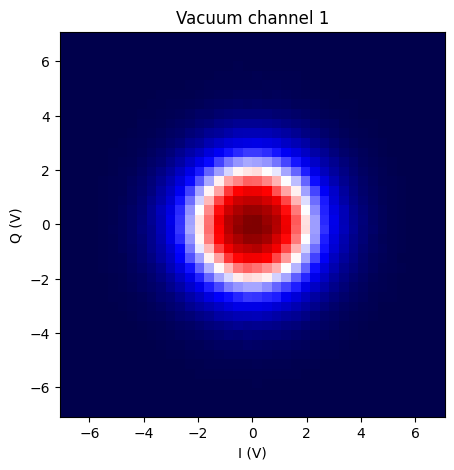

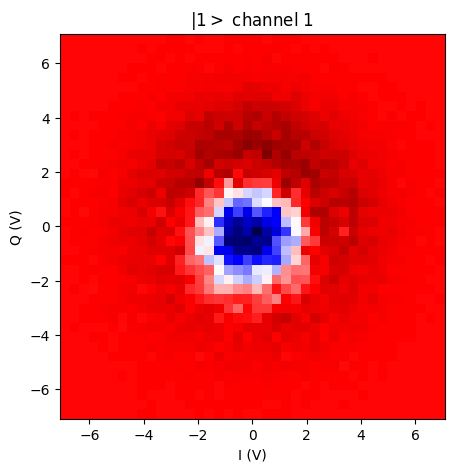

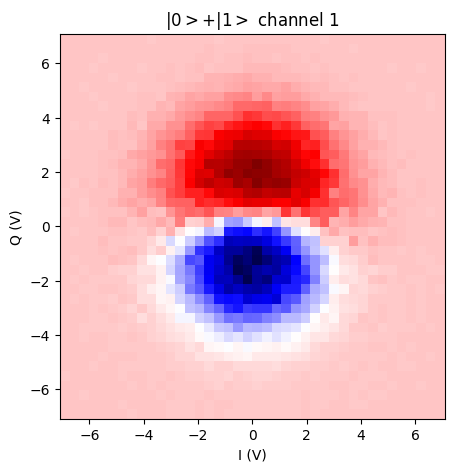

In [29]:
max_ch1 = np.abs(S1_pi).std()*3
bins = 40
hist_ch1_vac, x_e, y_e = np.histogram2d(S1_vac.real, S1_vac.imag, bins=bins, range=[[-2*max_ch1, 2*max_ch1], [-2*max_ch1, 2*max_ch1]])
hist_ch1_pi, x_e, y_e = np.histogram2d(S1_pi.real, S1_pi.imag, bins=bins, range=[[-2*max_ch1, 2*max_ch1], [-2*max_ch1, 2*max_ch1]])
hist_ch1_pi_half, x_e, y_e = np.histogram2d(S1_pi_half.real, S1_pi_half.imag, bins=bins, range=[[-2*max_ch1, 2*max_ch1], [-2*max_ch1, 2*max_ch1]])

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(hist_ch1_vac, extent=[x_e[0], x_e[-1], y_e[0], y_e[-1]], origin='lower', cmap='seismic')
ax.set_xlabel('I (V)')
ax.set_ylabel('Q (V)')
ax.set_title('Vacuum channel 1')  

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(hist_ch1_pi - hist_ch1_vac, extent=[x_e[0], x_e[-1], y_e[0], y_e[-1]], origin='lower', cmap='seismic')
ax.set_xlabel('I (V)')
ax.set_ylabel('Q (V)')
ax.set_title('$|1>$ channel 1')

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(hist_ch1_pi_half - hist_ch1_vac, extent=[x_e[0], x_e[-1], y_e[0], y_e[-1]], origin='lower', cmap='seismic')
ax.set_xlabel('I (V)')
ax.set_ylabel('Q (V)')
ax.set_title('$|0> + |1>$ channel 1')


Text(0.5, 1.0, '$|0> + |1>$ channel 2')

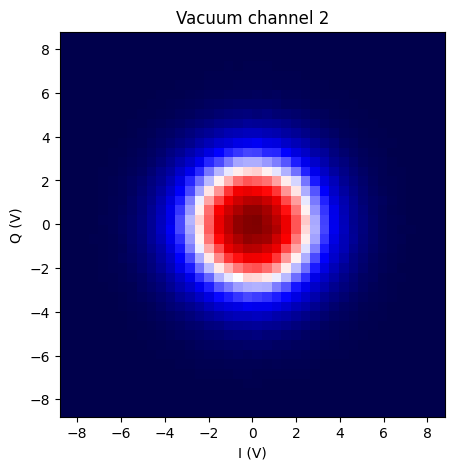

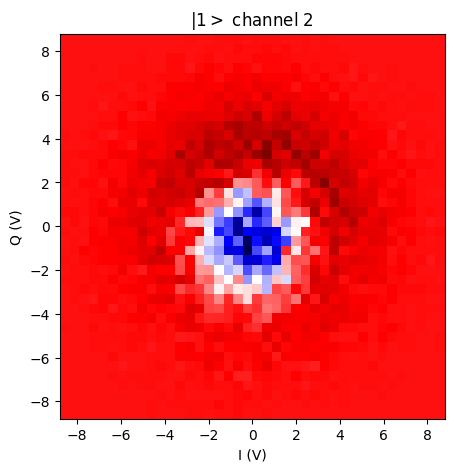

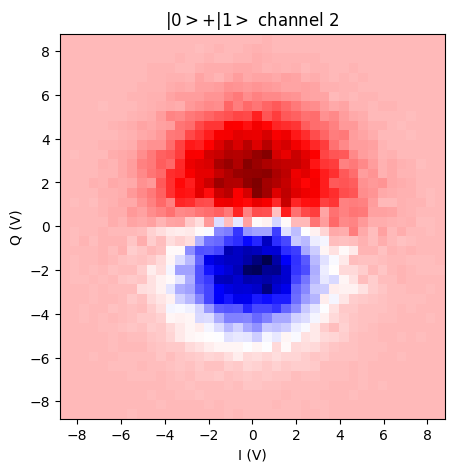

In [30]:
max_ch2 = np.abs(S2_pi).std()*3
bins = 40
hist_ch2_vac, x_e, y_e = np.histogram2d(S2_vac.real, S2_vac.imag, bins=bins, range=[[-2*max_ch2, 2*max_ch2], [-2*max_ch2, 2*max_ch2]])
hist_ch2_pi, x_e, y_e = np.histogram2d(S2_pi.real, S2_pi.imag, bins=bins, range=[[-2*max_ch2, 2*max_ch2], [-2*max_ch2, 2*max_ch2]])
hist_ch2_pi_half, x_e, y_e = np.histogram2d(S2_pi_half.real, S2_pi_half.imag, bins=bins, range=[[-2*max_ch2, 2*max_ch2], [-2*max_ch2, 2*max_ch2]])

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(hist_ch2_vac, extent=[x_e[0], x_e[-1], y_e[0], y_e[-1]], origin='lower', cmap='seismic')
ax.set_xlabel('I (V)')
ax.set_ylabel('Q (V)')
ax.set_title('Vacuum channel 2')  

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(hist_ch2_pi - hist_ch2_vac, extent=[x_e[0], x_e[-1], y_e[0], y_e[-1]], origin='lower', cmap='seismic')
ax.set_xlabel('I (V)')
ax.set_ylabel('Q (V)')
ax.set_title('$|1>$ channel 2')

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(hist_ch2_pi_half - hist_ch2_vac, extent=[x_e[0], x_e[-1], y_e[0], y_e[-1]], origin='lower', cmap='seismic')
ax.set_xlabel('I (V)')
ax.set_ylabel('Q (V)')
ax.set_title('$|0> + |1>$ channel 2')

# Moments based reconstruction

In [31]:
# Compute measured moments up to order 4
max_order = 4

# Compute noise moments
gnd_moments, gnd_moments_unc  = calculate_cross_moments_uncertainty_vectorized(S1_vac, S2_vac, max_order)

# Compute measured moments up to order 4
sig_pi_moments, sig_pi_moments_unc  = calculate_cross_moments_uncertainty_vectorized(S1_pi, S2_pi, max_order)
sig_pi_half_moments, sig_pi_half_moments_unc  = calculate_cross_moments_uncertainty_vectorized(S1_pi_half, S2_pi_half, max_order)

In [32]:
d = 20

#Maximum Likelihood reconstruction
gnd_rec_MBR = moments_to_density_matrix_ml(gnd_moments, gnd_moments_unc, d)
sig_pi_rec_MBR = moments_to_density_matrix_ml(sig_pi_moments, sig_pi_moments_unc, d)
sig_pi_half_rec_MBR = moments_to_density_matrix_ml(sig_pi_half_moments, sig_pi_half_moments_unc, d)

c:\Users\labranca\Documents\EnvPython\quantumEnv\Lib\site-packages\cvxpy\problems\problem.py:1481: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [33]:
np.savez(f"../Results/2channels-data_MBR_N0-{N0_ch1*1000:.0f}-{N0_ch2*1000:.0f}.npz", rho_gnd=gnd_rec_MBR, rho_sig_pi=sig_pi_rec_MBR, rho_sig_pi_half=sig_pi_half_rec_MBR, moments_sig_pi_half=sig_pi_half_moments, moments_sig_pi_half_unc=sig_pi_half_moments_unc, moments_sig_pi=sig_pi_moments, moments_sig_pi_unc=sig_pi_moments_unc)

## Plots

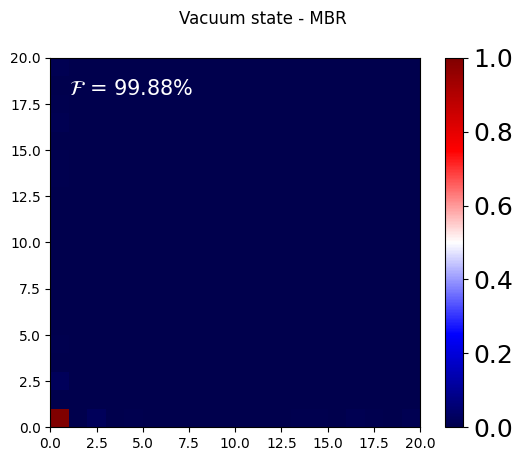

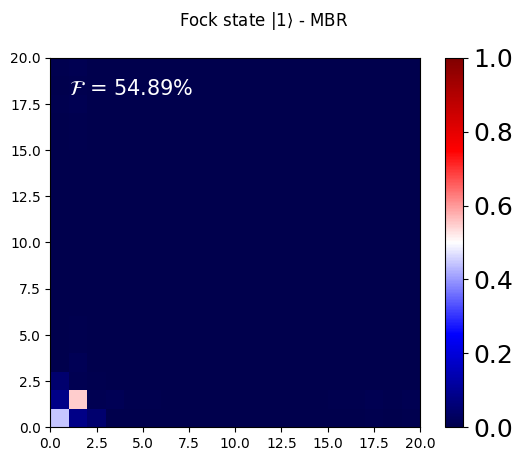

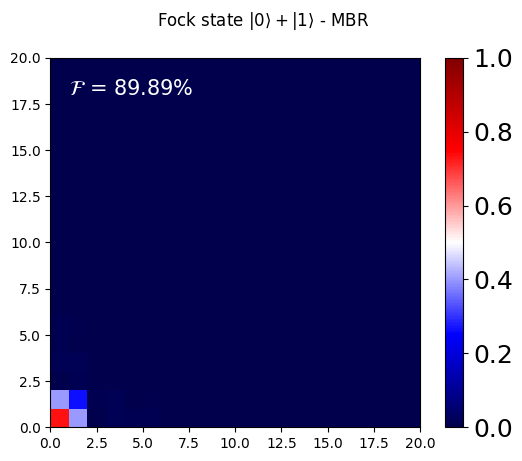

In [34]:
fig, ax = plt.subplots()
fig.suptitle('Vacuum state - MBR')
cm = ax.pcolormesh(np.abs(gnd_rec_MBR), cmap='seismic', vmin=0, vmax=1)
cb = plt.colorbar(cm, ax=ax)
cb.ax.tick_params('both', labelsize=18)
ax.text(1,d-2,'$\\mathcal{F}$ = ' + f'{100*qt.fidelity(qt.Qobj(gnd_rec_MBR), qt.fock_dm(d,0))**2:.2f}%', fontsize=15, color='white')
ax.set_aspect('equal', adjustable='box')

fig, ax = plt.subplots()
fig.suptitle('Fock state $|1 \\rangle$ - MBR')
cm = ax.pcolormesh(np.abs(sig_pi_rec_MBR), cmap='seismic', vmin=0, vmax=1)
cb = plt.colorbar(cm, ax=ax)
cb.ax.tick_params('both', labelsize=18)
ax.text(1,d-2,'$\\mathcal{F}$ = ' + f'{100*qt.fidelity(qt.Qobj(sig_pi_rec_MBR), qt.fock_dm(d,1))**2:.2f}%', fontsize=15, color='white')
ax.set_aspect('equal', adjustable='box')


fig, ax = plt.subplots()
fig.suptitle('Fock state $|0 \\rangle + |1 \\rangle$ - MBR')
cm = ax.pcolormesh(np.abs(sig_pi_half_rec_MBR), cmap='seismic', vmin=0, vmax=1)
cb = plt.colorbar(cm, ax=ax)
cb.ax.tick_params('both', labelsize=18)
st = np.sqrt(1/2) * (qt.basis(d,1) +  qt.basis(d,0))
ax.text(1,d-2,'$\\mathcal{F}$ = ' + f'{100*qt.fidelity(qt.Qobj(sig_pi_half_rec_MBR), st*st.dag())**2:.2f}%', fontsize=15, color='white')
ax.set_aspect('equal', adjustable='box')

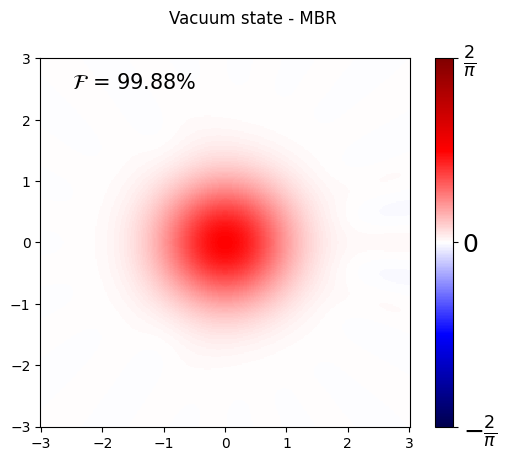

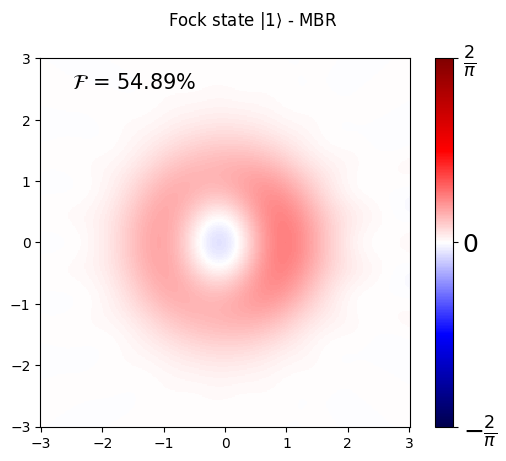

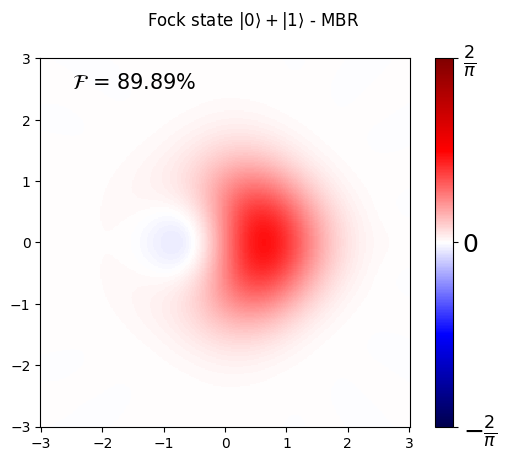

In [35]:
x_s, p_s = np.linspace(-3,3,301), np.linspace(-3,3,301)

fig, ax = plt.subplots()
fig.suptitle('Vacuum state - MBR')
cm = ax.pcolormesh(x_s, p_s, qt.wigner(qt.Qobj(gnd_rec_MBR), x_s, p_s), cmap='seismic', vmax=2/np.pi, vmin=-2/np.pi)
cb = plt.colorbar(cm, ax=ax)
cb.ax.tick_params('both', labelsize=18)
cb.set_ticks([-2/np.pi, 0, 2/np.pi])
cb.set_ticklabels(['$-\\frac{2}{\\pi}$', '0', '$\\frac{2}{\\pi}$'])
ax.text(-2.5,2.5,'$\\mathcal{F}$ = ' + f'{100*qt.fidelity(qt.Qobj(gnd_rec_MBR), qt.fock_dm(d,0))**2:.2f}%', fontsize=15)
ax.set_aspect('equal', adjustable='box')

fig, ax = plt.subplots()
fig.suptitle('Fock state $|1 \\rangle$ - MBR')
cm = ax.pcolormesh(x_s, p_s, qt.wigner(qt.Qobj(sig_pi_rec_MBR), x_s, p_s), cmap='seismic', vmax=2/np.pi, vmin=-2/np.pi)
cb = plt.colorbar(cm, ax=ax)
cb.ax.tick_params('both', labelsize=18)
cb.set_ticks([-2/np.pi, 0, 2/np.pi])
cb.set_ticklabels(['$-\\frac{2}{\\pi}$', '0', '$\\frac{2}{\\pi}$'])
ax.text(-2.5,2.5,'$\\mathcal{F}$ = ' + f'{100*qt.fidelity(qt.Qobj(sig_pi_rec_MBR), qt.fock_dm(d,1))**2:.2f}%', fontsize=15)
ax.set_aspect('equal', adjustable='box')


fig, ax = plt.subplots()
fig.suptitle('Fock state $|0 \\rangle + |1 \\rangle$ - MBR')
cm = ax.pcolormesh(x_s, p_s, qt.wigner(qt.Qobj(sig_pi_half_rec_MBR), x_s, p_s), cmap='seismic', vmax=2/np.pi, vmin=-2/np.pi)
cb = plt.colorbar(cm, ax=ax)
cb.ax.tick_params('both', labelsize=18)
cb.set_ticks([-2/np.pi, 0, 2/np.pi])
cb.set_ticklabels(['$-\\frac{2}{\\pi}$', '0', '$\\frac{2}{\\pi}$'])
st = np.sqrt(1/2) * (qt.basis(d,1) +  qt.basis(d,0))
ax.text(-2.5,2.5,'$\\mathcal{F}$ = ' + f'{100*qt.fidelity(qt.Qobj(sig_pi_half_rec_MBR), st*st.dag())**2:.2f}%', fontsize=15)
ax.set_aspect('equal', adjustable='box')

In [36]:
print('g2 thermal:', g2_from_moments_with_uncertainty(gnd_moments, gnd_moments_unc)[0], ' +/- ', g2_from_moments_with_uncertainty(gnd_moments, gnd_moments_unc)[1])
print('g2 pi:', g2_from_moments_with_uncertainty(sig_pi_moments, sig_pi_moments_unc)[0], ' +/- ', g2_from_moments_with_uncertainty(sig_pi_moments, sig_pi_moments_unc)[1])
print('g2 pi half:', g2_from_moments_with_uncertainty(sig_pi_half_moments, sig_pi_half_moments_unc)[0], ' +/- ', g2_from_moments_with_uncertainty(sig_pi_half_moments, sig_pi_half_moments_unc)[1])

print('g2 pi:', g2_from_density_matrix(sig_pi_rec_MBR))
print('g2 pi half:', g2_from_density_matrix(sig_pi_half_rec_MBR))

g2 thermal: 1076.497964394552  +/-  2012.0851577515048
g2 pi: 0.30004419153375844  +/-  0.2852420258176188
g2 pi half: 0.683868269138473  +/-  1.0571745238118975
g2 pi: 0.40849993030871495
g2 pi half: 2.1855570177289234
